In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

dosn't found a null data

**Drop Unimportant data**

🔘 There are two columns Unnamed: 0 and id,These two columns are of no use in the classification. It is better to delete these two columns

In [4]:
column_to_drop=['Unnamed: 0', 'id']
train_df = train_df.drop(column_to_drop, axis=1)

# Encoding

In [5]:
# Categorical variables before encoding
print(train_df['Gender'].unique())
print(train_df['Customer Type'].unique())
print(train_df['Type of Travel'].unique())
print(train_df['Class'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


In [6]:
obj_data=["Gender","Customer Type","Type of Travel","Class",'satisfaction']
encoder=LabelEncoder()
for col in obj_data:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    

{'Female': 0, 'Male': 1}
{'Loyal Customer': 0, 'disloyal Customer': 1}
{'Business travel': 0, 'Personal Travel': 1}
{'Business': 0, 'Eco': 1, 'Eco Plus': 2}
{'neutral or dissatisfied': 0, 'satisfied': 1}


# split data

In [7]:
X_train = train_df.drop('satisfaction', axis=1)  
y_train = train_df['satisfaction']

X_test = test_df.drop('satisfaction', axis=1)  
y_test = test_df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Deal with missing values

In [8]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# StandardScaler() output is a NumPy array, not a DataFrame

# Standardization
Standardization scales features by subtracting the mean and then dividing by the standard deviation. This results in features that have a mean of 0 and a standard deviation of 1.

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_scaled = scaler.transform(X_test_imputed)


# Models

### Random Forest Classifier

In [10]:
rfc=RandomForestClassifier()

rfc.fit(X_train_scaled,y_train)

accuracy=rfc.score(X_test_scaled, y_test)

print("accuracy =", round(accuracy * 100, 2), "%")

accuracy = 96.23 %


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Average satisfaction probability is 0.4364


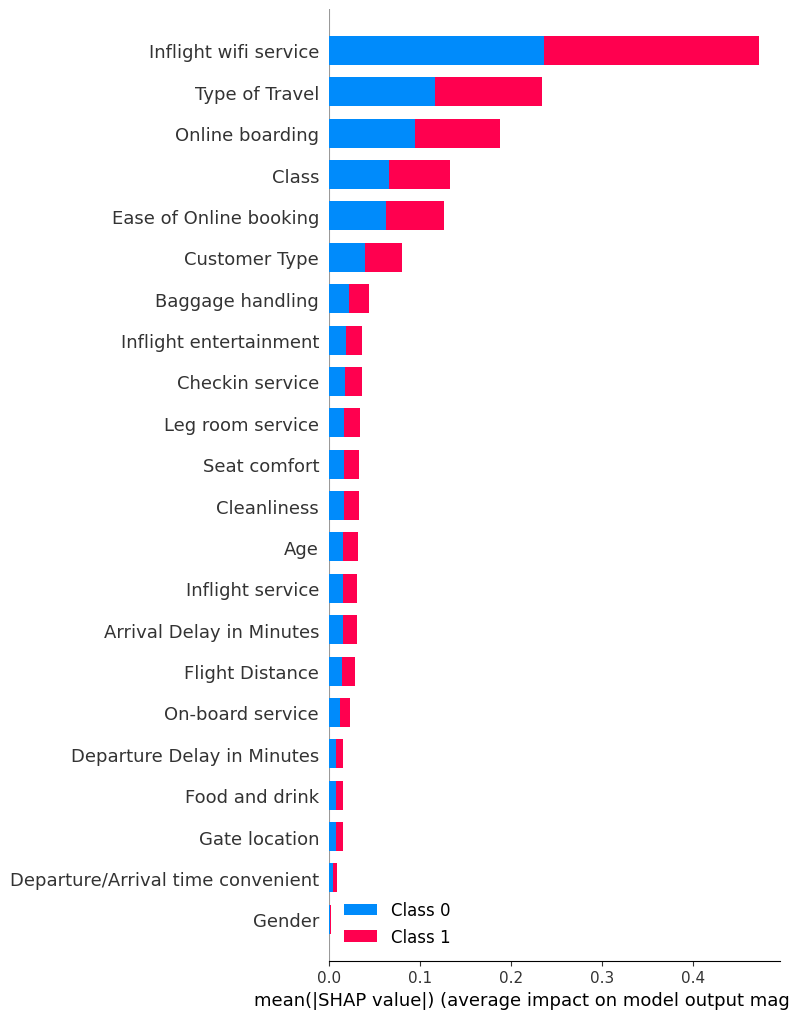

In [27]:
# Import SHAP for model interpretation
import shap

# Initialize the JavaScript visualization for SHAP (SHapley Additive exPlanations)
shap.initjs()

# Create a SHAP TreeExplainer object for the 'model' to explain its predictions
ex = shap.TreeExplainer(rfc)

# Print the average label probability in the test data rounded to four decimal places
print(f"Average satisfaction probability is {round(np.mean(y_test), 4)}")

# Calculate SHAP values for the test data to understand feature contributions to predictions
shap_values = ex.shap_values(X_test)

# Create a summary plot of SHAP values for up to 30 features in 'X_test'
shap.summary_plot(shap_values, X_test, max_display=30)